About the Dataset: 
The project contains the dataset to classify the types of fault in electric transmission.

Inputs - [Ia,Ib,Ic,Va,Vb,Vc]
Ia = Current in line A

Ib = Current in line B

Ic = Current in line C

Va = Voltage in line A

Vb = Voltage in line B

Vc = Voltage in line C

Example :

[G C B A] - Outputs

[0 0 0 0] - No Fault

[1 0 0 0] - Ground Fault
[0 0 0 1] - Fault in Line A
[0 0 1 0] - Fault in Line B
[0 1 0 0] - Fault in Line C

[1 0 0 1] - LG fault (Between Phase A and Ground)
[1 0 1 0] - LG fault (Between Phase B and Ground)
[1 1 0 0] - LG fault (Between Phase C and Ground)

[0 0 1 1] - LL fault (Between Phase B and Phase A)
[0 1 1 0] - LL fault (Between Phase C and Phase B)
[0 1 0 1] - LL fault (Between Phase C and Phase A)

[1 0 1 1] - LLG Fault (Between Phases A,B and Ground)
[1 1 0 1] - LLG Fault (Between Phases A,C and Ground)
[1 1 1 0] - LLG Fault (Between Phases C,B and Ground)
[0 1 1 1] - LLL Fault(Between all three phases)

[1 1 1 1] - LLLG fault( Three phase symmetrical fault)

In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

import warnings
warnings.filterwarnings('ignore')

In [203]:
pwd

'C:\\Users\\Slim5pro-LXIN\\Desktop\\python_folder'

In [204]:
classData_df = pd.read_csv(r'C:\Users\Slim5pro-LXIN\Desktop\python_folder\classData.csv')

In [205]:
classData_df.head(15)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.29,-9.68,85.80,0.40,-1.33e-01,-0.27
1,1,0,0,1,-336.19,-76.28,18.33,0.31,-1.24e-01,-0.19
2,1,0,0,1,-502.89,-174.65,-80.92,0.27,-1.14e-01,-0.15
3,1,0,0,1,-593.94,-217.70,-124.89,0.24,-1.05e-01,-0.13
4,1,0,0,1,-643.66,-224.16,-132.28,0.21,-9.56e-02,-0.11
5,1,0,0,1,-632.31,-181.71,-90.80,0.19,-8.61e-02,-0.11
6,1,0,0,1,-557.39,-119.47,-29.53,0.21,-7.67e-02,-0.13
7,1,0,0,1,-458.80,-96.32,-7.38,0.27,-6.73e-02,-0.21
8,1,0,0,1,-385.67,-97.99,-10.08,0.33,-5.78e-02,-0.28
9,1,0,0,1,-359.93,-87.32,-0.45,0.35,-4.83e-02,-0.30


In [206]:
classData_df.tail(15)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
7846,0,0,0,0,-69.31,48.22,18.22,-2.12e-04,-0.51,0.51
7847,0,0,0,0,-69.07,47.26,18.94,9.30e-03,-0.52,0.51
7848,0,0,0,0,-68.82,46.30,19.65,1.88e-02,-0.52,0.50
7849,0,0,0,0,-68.55,45.33,20.35,2.83e-02,-0.53,0.50
7850,0,0,0,0,-68.26,44.35,21.04,3.78e-02,-0.53,0.49
7851,0,0,0,0,-67.96,43.38,21.71,4.73e-02,-0.53,0.49
7852,0,0,0,0,-67.65,42.40,22.38,5.68e-02,-0.54,0.48
7853,0,0,0,0,-67.32,41.42,23.03,6.62e-02,-0.54,0.48
7854,0,0,0,0,-66.97,40.43,23.67,7.56e-02,-0.55,0.47
7855,0,0,0,0,-66.61,39.45,24.30,8.50e-02,-0.55,0.46


In [207]:
# get information about the datatype of each column contained in our data
classData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


Info of the dataset shows that there are no missing values.

In [208]:
# Get all colums contained in the dataset.
classData_df.columns

Index(['G', 'C', 'B', 'A', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'], dtype='object')

In [209]:
# get statistical summaries for numeric columns
classData_df.describe().T

,count,mean,std,min,25%,50%,75%,max
G,7861.0,4.32e-01,0.50,0.00,0.00,0.00e+00,1.00,1.00
C,7861.0,4.11e-01,0.49,0.00,0.00,0.00e+00,1.00,1.00
B,7861.0,5.56e-01,0.50,0.00,0.00,1.00e+00,1.00,1.00
A,7861.0,5.71e-01,0.49,0.00,0.00,1.00e+00,1.00,1.00
Ia,7861.0,1.37e+01,464.74,-883.54,-119.80,2.04e+00,227.25,885.74
Ib,7861.0,-4.48e+01,439.27,-900.53,-271.85,5.51e+00,91.19,889.87
Ic,7861.0,3.44e+01,371.11,-883.36,-61.03,-4.33e+00,49.12,901.27
Va,7861.0,-7.67e-03,0.29,-0.62,-0.13,-5.29e-03,0.11,0.60
Vb,7861.0,1.15e-03,0.31,-0.61,-0.16,1.62e-03,0.15,0.63
Vc,7861.0,6.51e-03,0.31,-0.61,-0.22,9.28e-03,0.24,0.60


In [210]:
print('Number of rows : {}'.format(classData_df.shape[0]))
print('Number of features : {}'.format(classData_df.shape[1]))
classData_df.shape

Number of rows : 7861
Number of features : 10


(7861, 10)

In [211]:
#checking for null values in the dataset 
classData_df.isnull().sum()

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

No null values seen in the dataset.

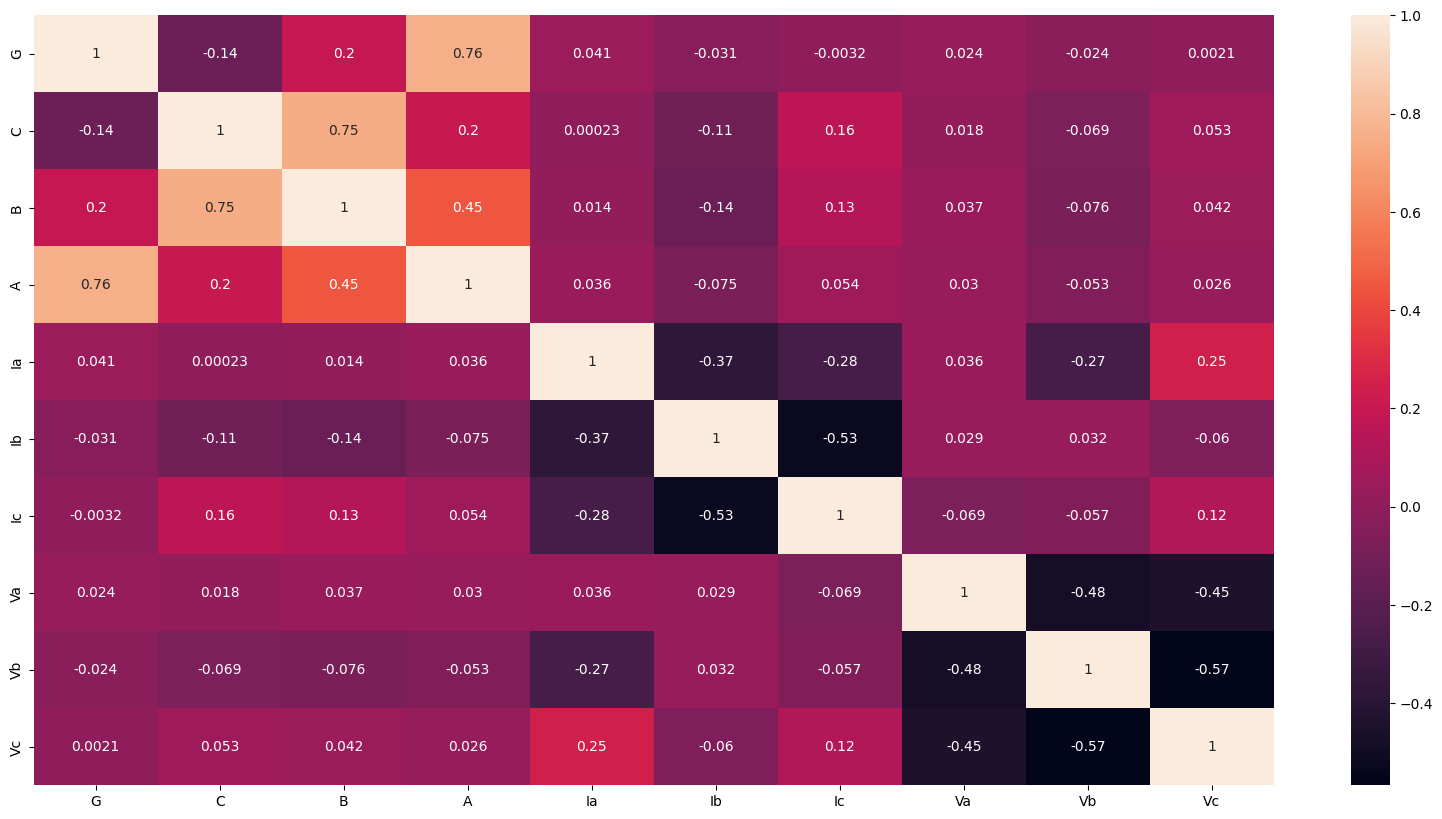

In [212]:
#Correlation Between features
plt.figure(figsize=(20,10))
sns.heatmap(classData_df.corr(), annot=True)
plt.show()

Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate in relation to each other.

In [213]:
#frequency count of categorical features data
col_names = ['G','C','B','A']

for col in col_names:
    print(classData_df[col].value_counts())

0    4465
1    3396
Name: G, dtype: int64
0    4628
1    3233
Name: C, dtype: int64
1    4367
0    3494
Name: B, dtype: int64
1    4492
0    3369
Name: A, dtype: int64


###### Composition of target Variable

0 - indicates no fault

1 - fault present

Text(0.5, 1.0, 'Ground Fault')

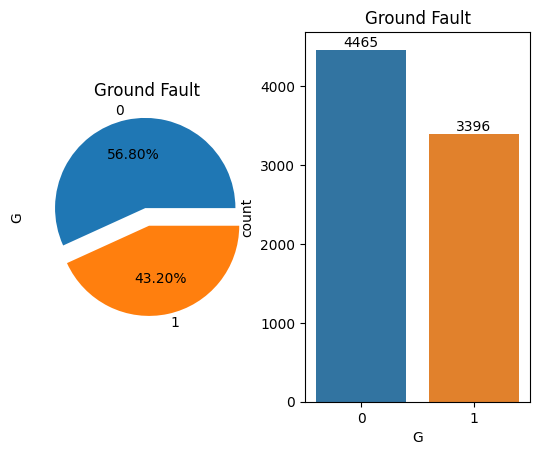

In [214]:
fig =plt.subplot(1,2,1)
fig=classData_df['G'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%.2f%%')
fig.set_title(label = "Ground Fault")

fig = plt.subplot(1,2,2)
fig = sns.countplot(x='G', data=classData_df)
fig.bar_label(fig.containers[0])
plt.title("Ground Fault")



3396 instances contains ground fault

4465 rows does not have ground faults

Text(0.5, 1.0, 'Line A Fault')

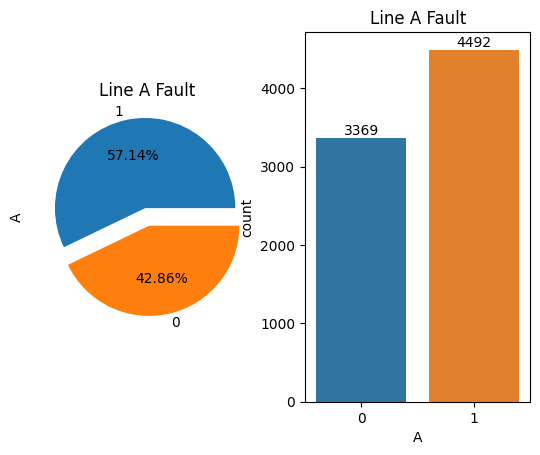

In [216]:
fig =plt.subplot(1,2,1)
fig=classData_df['A'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%.2f%%')
fig.set_title(label = "Line A Fault")

fig = plt.subplot(1,2,2)
fig = sns.countplot(x='A', data=classData_df)
fig.bar_label(fig.containers[0])
plt.title("Line A Fault")

4492 instances contains fault in Line A

3369 rows does not have any faults in Line A

Text(0.5, 1.0, 'Line B Fault')

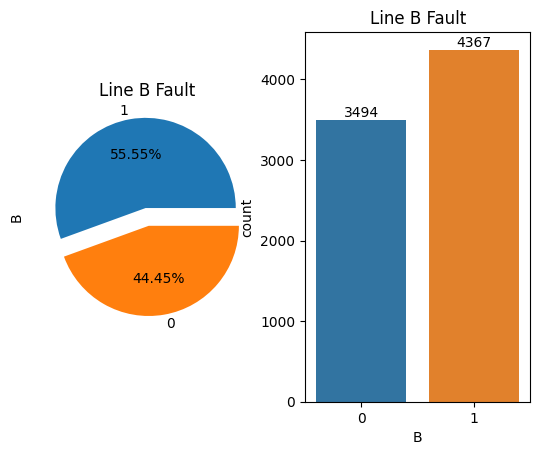

In [217]:
fig =plt.subplot(1,2,1)
fig =classData_df['B'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%.2f%%');
fig.set_title(label = "Line B Fault")

fig = plt.subplot(1,2,2)
fig = sns.countplot(x='B', data=classData_df)
fig.bar_label(fig.containers[0])
plt.title("Line B Fault")


4367 instances contains fault in Line B

3494 rows does not have any faults in Line B

Text(0.5, 1.0, 'Line C Fault')

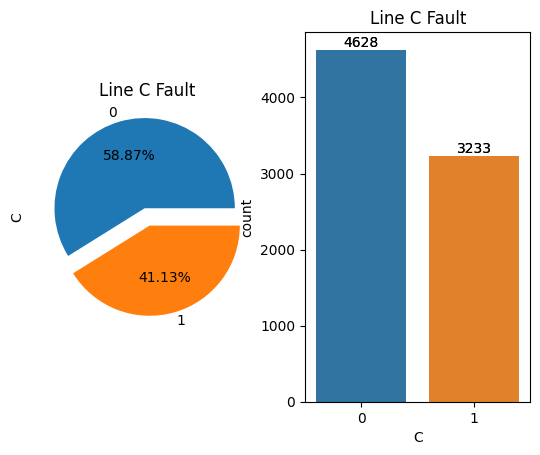

In [218]:
fig =plt.subplot(1,2,1)
fig=classData_df['C'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%.2f%%')
fig.set_title(label = "Line C Fault")

fig = plt.subplot(1,2,2)
fig = sns.countplot(x='C', data=classData_df)
fig.bar_label(fig.containers[0])
fig.bar_label(fig.containers[0])
plt.title("Line C Fault")

3233 instances contains fault in Line C

4628 rows does not have faults in Line C

###### Creating additional column containing all the Line Faults 

In [219]:
#Creating additional column containing Faults of line G,C,B,A
classData_df['Fault_Type'] = classData_df['G'].astype('str') + classData_df['C'].astype('str') + classData_df['B'].astype('str') + classData_df['A'].astype('str')

In [220]:
classData_df.head(20)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.29,-9.68,85.80,0.40,-1.33e-01,-0.27,1001
1,1,0,0,1,-336.19,-76.28,18.33,0.31,-1.24e-01,-0.19,1001
2,1,0,0,1,-502.89,-174.65,-80.92,0.27,-1.14e-01,-0.15,1001
3,1,0,0,1,-593.94,-217.70,-124.89,0.24,-1.05e-01,-0.13,1001
4,1,0,0,1,-643.66,-224.16,-132.28,0.21,-9.56e-02,-0.11,1001
5,1,0,0,1,-632.31,-181.71,-90.80,0.19,-8.61e-02,-0.11,1001
6,1,0,0,1,-557.39,-119.47,-29.53,0.21,-7.67e-02,-0.13,1001
7,1,0,0,1,-458.80,-96.32,-7.38,0.27,-6.73e-02,-0.21,1001
8,1,0,0,1,-385.67,-97.99,-10.08,0.33,-5.78e-02,-0.28,1001
9,1,0,0,1,-359.93,-87.32,-0.45,0.35,-4.83e-02,-0.30,1001


In [221]:
classData_df.tail(20)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
7841,0,0,0,0,-70.28,52.95,14.46,-4.78e-02,-0.49,0.54,0000
7842,0,0,0,0,-70.12,52.01,15.23,-3.83e-02,-0.49,0.53,0000
7843,0,0,0,0,-69.94,51.07,16.00,-2.88e-02,-0.50,0.53,0000
7844,0,0,0,0,-69.75,50.13,16.75,-1.92e-02,-0.50,0.52,0000
7845,0,0,0,0,-69.54,49.18,17.49,-9.73e-03,-0.51,0.52,0000
7846,0,0,0,0,-69.31,48.22,18.22,-2.12e-04,-0.51,0.51,0000
7847,0,0,0,0,-69.07,47.26,18.94,9.30e-03,-0.52,0.51,0000
7848,0,0,0,0,-68.82,46.30,19.65,1.88e-02,-0.52,0.50,0000
7849,0,0,0,0,-68.55,45.33,20.35,2.83e-02,-0.53,0.50,0000
7850,0,0,0,0,-68.26,44.35,21.04,3.78e-02,-0.53,0.49,0000


In [222]:
#Checking frequency of each Fault type 
classData_df['Fault_Type'].value_counts()

0000    2365
1011    1134
1111    1133
1001    1129
0111    1096
0110    1004
Name: Fault_Type, dtype: int64

Reading Fault types in binary digits is difficult and confusing, Therefore, giving proper names to the type of Faults present in the dataset

In [223]:
#Classifying different Fault types into categorical data
classData_df['Fault_Type'][classData_df['Fault_Type'] == '0000' ] = 'NO Fault'
classData_df['Fault_Type'][classData_df['Fault_Type'] == '1011' ] = 'Line A Line B to Ground Fault'
classData_df['Fault_Type'][classData_df['Fault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'
classData_df['Fault_Type'][classData_df['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
classData_df['Fault_Type'][classData_df['Fault_Type'] == '0111' ] = 'Line A Line B Line C Fault'
classData_df['Fault_Type'][classData_df['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'

In [224]:
classData_df.head(10)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.29,-9.68,85.80,0.40,-0.13,-0.27,Line A to Ground Fault
1,1,0,0,1,-336.19,-76.28,18.33,0.31,-0.12,-0.19,Line A to Ground Fault
2,1,0,0,1,-502.89,-174.65,-80.92,0.27,-0.11,-0.15,Line A to Ground Fault
3,1,0,0,1,-593.94,-217.70,-124.89,0.24,-0.10,-0.13,Line A to Ground Fault
4,1,0,0,1,-643.66,-224.16,-132.28,0.21,-0.10,-0.11,Line A to Ground Fault
5,1,0,0,1,-632.31,-181.71,-90.80,0.19,-0.09,-0.11,Line A to Ground Fault
6,1,0,0,1,-557.39,-119.47,-29.53,0.21,-0.08,-0.13,Line A to Ground Fault
7,1,0,0,1,-458.80,-96.32,-7.38,0.27,-0.07,-0.21,Line A to Ground Fault
8,1,0,0,1,-385.67,-97.99,-10.08,0.33,-0.06,-0.28,Line A to Ground Fault
9,1,0,0,1,-359.93,-87.32,-0.45,0.35,-0.05,-0.30,Line A to Ground Fault


In [225]:
classData_df.tail(10)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
7851,0,0,0,0,-67.96,43.38,21.71,0.05,-0.53,0.49,NO Fault
7852,0,0,0,0,-67.65,42.40,22.38,0.06,-0.54,0.48,NO Fault
7853,0,0,0,0,-67.32,41.42,23.03,0.07,-0.54,0.48,NO Fault
7854,0,0,0,0,-66.97,40.43,23.67,0.08,-0.55,0.47,NO Fault
7855,0,0,0,0,-66.61,39.45,24.30,0.09,-0.55,0.46,NO Fault
7856,0,0,0,0,-66.24,38.46,24.91,0.09,-0.55,0.46,NO Fault
7857,0,0,0,0,-65.85,37.47,25.52,0.10,-0.56,0.45,NO Fault
7858,0,0,0,0,-65.45,36.47,26.11,0.11,-0.56,0.45,NO Fault
7859,0,0,0,0,-65.03,35.48,26.68,0.12,-0.56,0.44,NO Fault
7860,0,0,0,0,-64.60,34.48,27.25,0.13,-0.56,0.43,NO Fault


In [226]:
classData_df.sample(10)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
2495,0,1,1,0,-68.89,262.25,-190.91,-4.03e-01,-4.10e-02,0.44,Line B to Line C Fault
2624,0,1,1,0,9.89,552.24,-559.42,4.50e-01,2.78e-02,-0.48,Line B to Line C Fault
5903,0,0,0,0,-36.24,0.18,32.60,4.66e-01,-5.39e-01,0.07,NO Fault
1087,1,0,0,1,616.49,2.91,36.76,2.28e-01,-5.52e-01,0.32,Line A to Ground Fault
3860,0,1,1,1,683.52,-826.54,145.09,-8.65e-03,-3.16e-02,0.04,Line A Line B Line C Fault
3616,0,1,1,1,-167.79,835.84,-665.94,3.31e-02,6.39e-03,-0.04,Line A Line B Line C Fault
2910,0,1,1,0,-69.72,427.81,-355.72,-3.20e-01,-3.72e-02,0.36,Line B to Line C Fault
2370,0,1,1,0,28.07,-792.13,766.64,-1.36e-01,4.16e-03,0.13,Line B to Line C Fault
6580,0,0,0,0,-52.71,95.58,-46.11,-5.29e-01,1.88e-03,0.53,NO Fault
6772,0,0,0,0,29.59,-29.55,-3.22,5.38e-01,-3.80e-02,-0.50,NO Fault


In [227]:
#checking frequency count of each type of Fault
classData_df['Fault_Type'].value_counts()

NO Fault                                2365
Line A Line B to Ground Fault           1134
Line A Line B Line C to Ground Fault    1133
Line A to Ground Fault                  1129
Line A Line B Line C Fault              1096
Line B to Line C Fault                  1004
Name: Fault_Type, dtype: int64

(-1.25, 1.25, -1.25, 1.25)

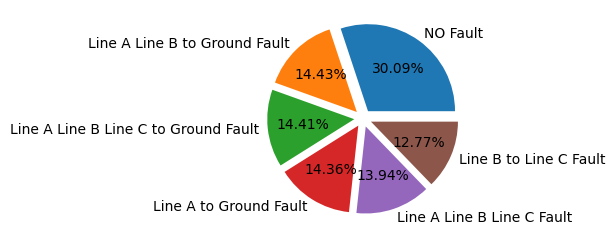

In [228]:
#Representation of frequency count of each fault type 
fig =plt.subplot(2,1,2)
fig=classData_df['Fault_Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1, 0.1,0.1],autopct='%.2f%%')
plt.tight_layout()
plt.axis('off')



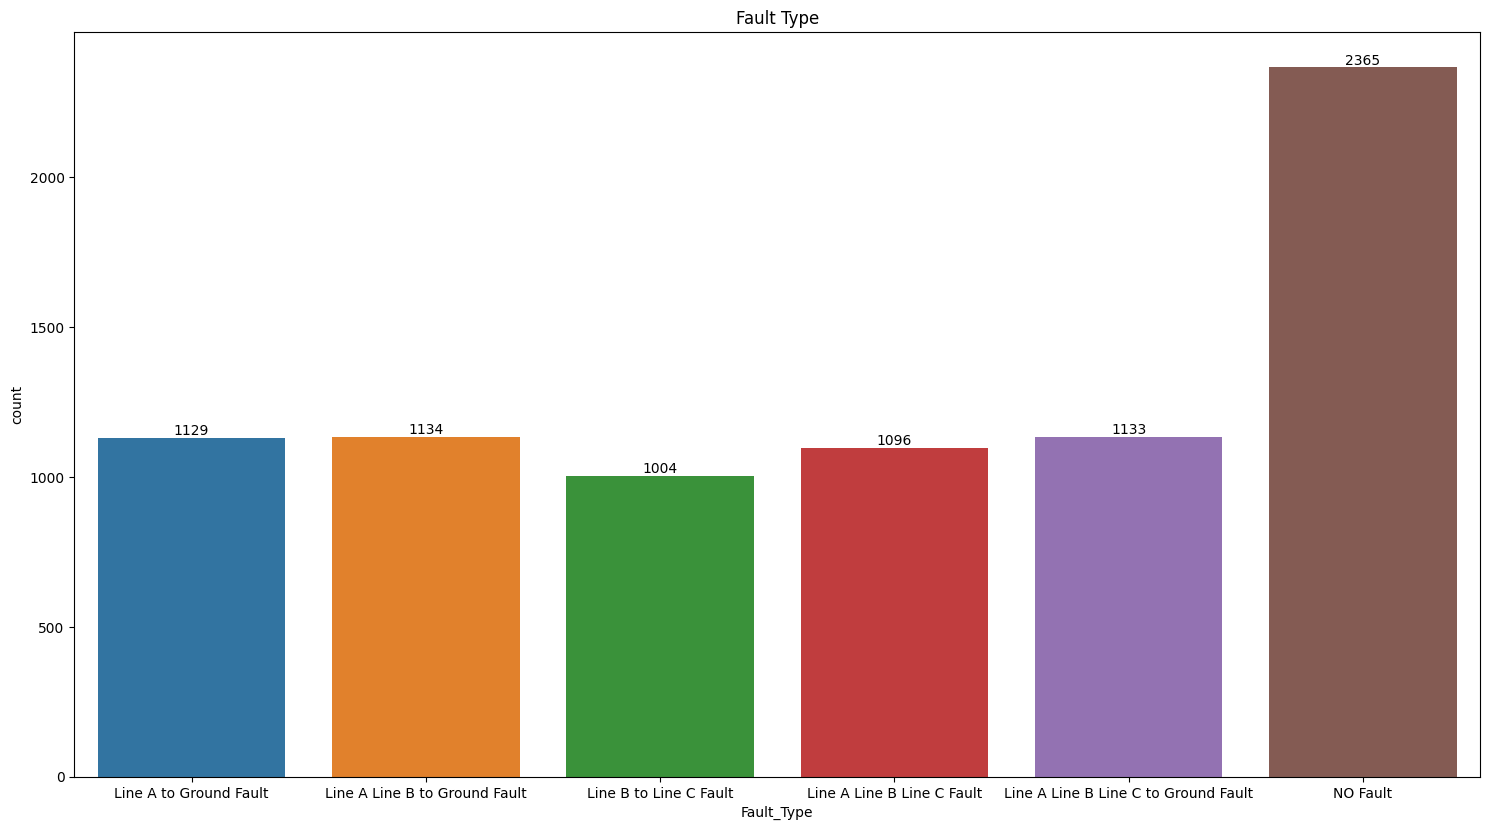

In [229]:
#Bar graph representation
fig = plt.figure(figsize = (15,16))
fig = plt.subplot(2,1,1)
fig = sns.countplot(x='Fault_Type', data=classData_df)
fig.bar_label(fig.containers[0])
plt.title("Fault Type")
plt.tight_layout()

###### Feature encoding 

In [230]:
#mapping categorical data to category_encoders
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
classData_df['Fault_Type'] = encoder.fit_transform(classData_df['Fault_Type'])
classData_df.head()


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.29,-9.68,85.80,0.40,-0.13,-0.27,3
1,1,0,0,1,-336.19,-76.28,18.33,0.31,-0.12,-0.19,3
2,1,0,0,1,-502.89,-174.65,-80.92,0.27,-0.11,-0.15,3
3,1,0,0,1,-593.94,-217.70,-124.89,0.24,-0.10,-0.13,3
4,1,0,0,1,-643.66,-224.16,-132.28,0.21,-0.10,-0.11,3


Converted non-numerical column of target variable to numerical values (feature encoding)

In [231]:
classData_df.tail()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
7856,0,0,0,0,-66.24,38.46,24.91,0.09,-0.55,0.46,5
7857,0,0,0,0,-65.85,37.47,25.52,0.10,-0.56,0.45,5
7858,0,0,0,0,-65.45,36.47,26.11,0.11,-0.56,0.45,5
7859,0,0,0,0,-65.03,35.48,26.68,0.12,-0.56,0.44,5
7860,0,0,0,0,-64.60,34.48,27.25,0.13,-0.56,0.43,5


In [232]:
classData_df.sample(5)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
2493,0,1,1,0,-68.48,238.94,-168.01,-0.41,-0.04,4.54e-01,4
4634,1,1,1,1,759.62,11.19,-770.80,0.04,-0.04,1.12e-03,1
877,1,0,0,1,-706.68,-13.93,-31.03,-0.18,0.51,-3.29e-01,3
5824,0,0,0,0,-72.28,74.21,-5.40,-0.21,-0.38,5.87e-01,5
3162,0,1,1,0,34.92,-763.69,731.19,-0.07,0.01,6.31e-02,4


In [233]:
#declaring attributes and target variable
X = classData_df.drop(['Fault_Type'],axis=1)
y = classData_df['Fault_Type']

In [234]:
#Splitting data into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.33,random_state=42)

In [235]:
#size of training and testing dataset
X_train.shape , X_test.shape

((5266, 10), (2595, 10))

In [236]:
X_train.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
3125,0,1,1,0,54.49,-560.52,508.54,0.21,3.15e-02,-0.24
2973,0,1,1,0,-38.80,785.06,-743.74,0.15,-3.57e-03,-0.15
71,1,0,0,1,-691.16,-25.18,-31.99,-0.14,4.72e-01,-0.33
3113,0,1,1,0,56.69,-449.52,395.38,0.29,3.63e-02,-0.33
3921,0,1,1,1,852.16,-220.67,-629.43,0.03,-4.12e-02,0.01


In [237]:
X_train.dtypes

G       int64
C       int64
B       int64
A       int64
Ia    float64
Ib    float64
Ic    float64
Va    float64
Vb    float64
Vc    float64
dtype: object

In [238]:
X_test.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
7096,0,0,0,0,-41.38,2.19,36.11,0.42,-0.56,0.14
1405,1,0,1,1,711.67,70.72,43.42,0.04,-0.38,0.34
994,1,0,0,1,688.79,70.62,-29.55,-0.28,0.19,0.09
2024,1,0,1,1,-531.63,-329.34,-52.71,-0.04,0.37,-0.32
5620,0,0,0,0,55.24,-3.68,-52.90,0.21,0.39,-0.61


In [1]:
# The notebook we referred to build our algorithms, particularly for Support vector machines and Random forest may be found at this citation : Prakash, E.S. (2021) Electrical fault detection and classification, Kaggle. Available at: https://www.kaggle.com/datasets/esathyaprakash/electrical-fault-detection-and-classification (Accessed: December 3, 2022). 

###### Implementation of Decision tree 

In [239]:
#importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [240]:
# Building machine learning model
decision_tree =  DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
decision_tree.fit(X_train, y_train)
y_prediction = decision_tree.predict(X_test)

In [241]:
from sklearn.metrics import accuracy_score

Y_prediction = decision_tree.predict(X_test)         
Y_training_prediction = decision_tree.predict(X_train)
Y_training_prediction

array([4, 4, 2, ..., 2, 5, 5])

In [242]:
print('Training set accuracy : {0:0.4f}'.format(accuracy_score(y_train,Y_training_prediction)*100))

Training set accuracy : 85.9286


In [243]:
print('Model accuracy score : {0:0.4f}'.format(accuracy_score(y_test,Y_prediction) *100))

Model accuracy score : 85.0482


In [244]:
decision_train = round(decision_tree.score(X_train,y_train) *100, 2)
decision_accuracy = round(decision_tree.score(X_test,y_test) *100, 2)

In [245]:
#Checking for overfitting
print('Training set score : {0:0.4f}'.format(decision_tree.score(X_train,y_train) *100))
print('Test set score : {0:0.4f}'.format(decision_tree.score(X_test,y_test) *100))

Training set score : 85.9286
Test set score : 85.0482


Text(0.5, 1.0, 'Confusion Matrix')

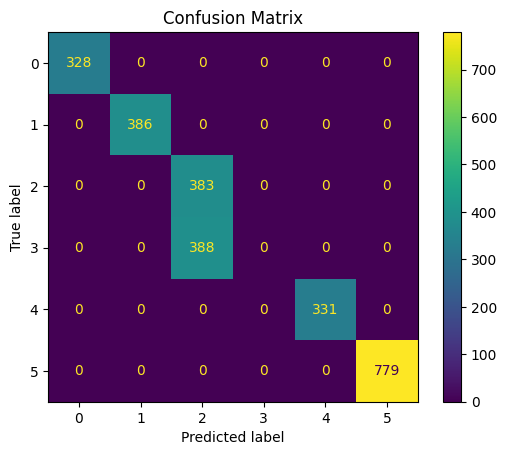

In [246]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(decision_tree, X_test, y_test);
plt.title('Confusion Matrix')

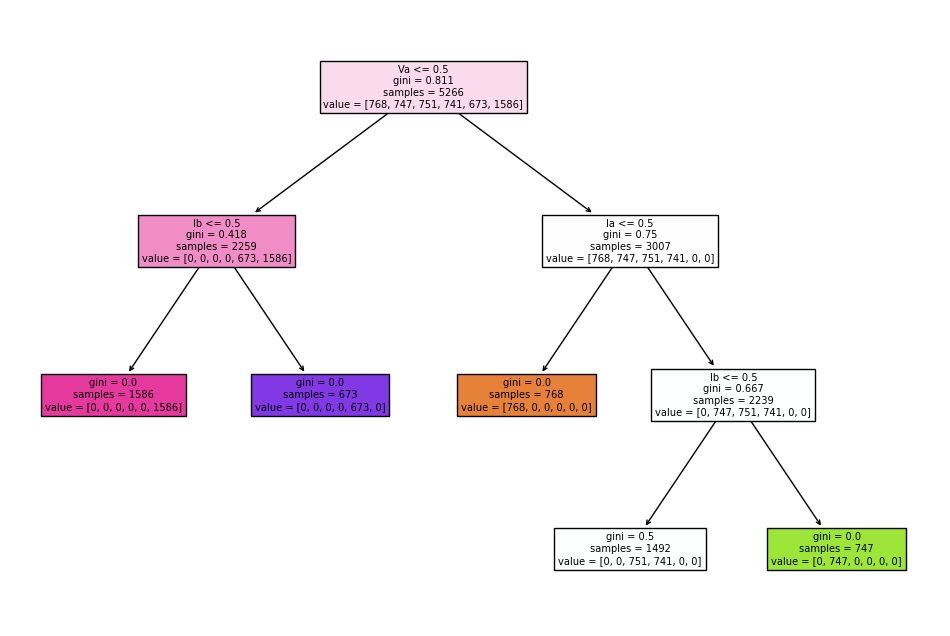

In [247]:
#decision tree diagram 
from sklearn import tree 

plt.figure(figsize = (12,8))
tree.plot_tree(decision_tree.fit(X_train,y_train),filled=True,feature_names=['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'])
plt.show()



###### Implementation of Logistic Regression model

In [248]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()                # Building machine learning model
logreg.fit(X_train, y_train)
y_prediction = logreg.predict(X_test)
logreg.score(X_train, y_train)

0.8414356247626282

In [249]:
# Evaluate the model on the training and test data
from sklearn.metrics import accuracy_score

log_train = round(logreg.score(X_train, y_train) * 100, 3)
log_accuracy = round(accuracy_score(y_prediction, y_test) * 100, 3)

In [250]:
print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")

Training Accuracy    : 84.144 %
Model Accuracy Score : 83.006 %


In [251]:
from sklearn.metrics import classification_report

print("Classification_Report: \n",classification_report(y_test,y_prediction))

Classification_Report: 
               precision    recall  f1-score   support

           0       0.55      1.00      0.71       328
           1       0.77      1.00      0.87       386
           2       0.82      0.70      0.76       383
           3       1.00      0.85      0.92       388
           4       1.00      0.19      0.32       331
           5       1.00      1.00      1.00       779

    accuracy                           0.83      2595
   macro avg       0.86      0.79      0.76      2595
weighted avg       0.88      0.83      0.81      2595



Text(0.5, 1.0, 'Confusion Matrix')

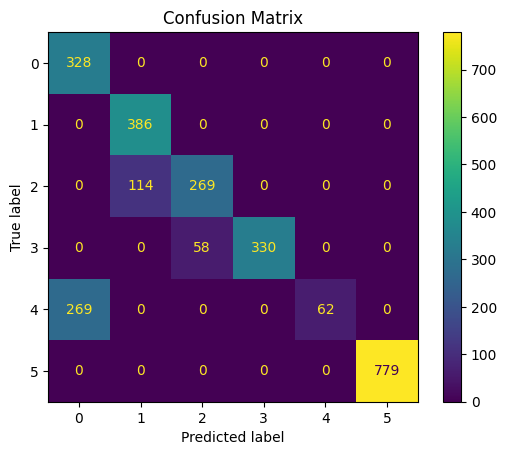

In [252]:
plot_confusion_matrix(logreg, X_test, y_test);
plt.title('Confusion Matrix')

###### Implementing Random Forest  

In [274]:
# Building machine learning model
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=2)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

0.9982909229016331

In [275]:
# Evaluate the model on the training and test data
random_forest_train = round(random_forest.score(X_train, y_train) * 100, 3)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 3)

In [276]:
print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")

Training Accuracy    : 99.829 %
Model Accuracy Score : 99.499 %


In [277]:
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))

Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       328
           1       1.00      0.97      0.98       386
           2       1.00      1.00      1.00       383
           3       1.00      1.00      1.00       388
           4       1.00      1.00      1.00       331
           5       1.00      1.00      1.00       779

    accuracy                           0.99      2595
   macro avg       0.99      0.99      0.99      2595
weighted avg       1.00      0.99      0.99      2595



Text(0.5, 1.0, 'Confusion Matrix')

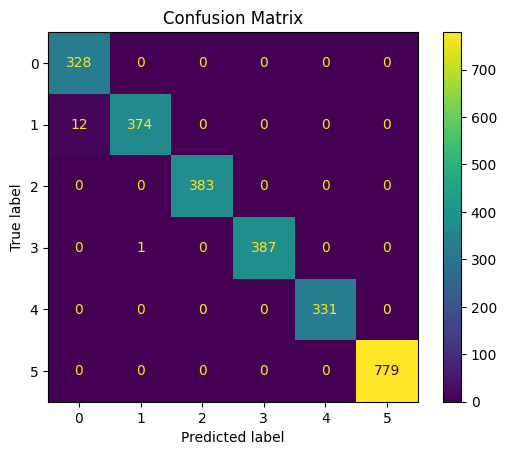

In [278]:
plot_confusion_matrix(random_forest, X_test, y_test);
plt.title('Confusion Matrix')

###### Implementing Support vector Machines

In [279]:
# Building machine learning model
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
svc.score(X_train, y_train)

0.7630079756931257

In [280]:
# Evaluate the model on the training and test data
svc_train = round(svc.score(X_train, y_train) * 100, 3)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 3)

In [281]:
print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")

Training Accuracy    : 76.301 %
Model Accuracy Score : 74.875 %


In [282]:
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))

Classification_Report: 
               precision    recall  f1-score   support

           0       0.46      0.62      0.53       328
           1       0.48      0.08      0.13       386
           2       0.74      0.79      0.77       383
           3       0.78      0.86      0.82       388
           4       0.77      0.89      0.82       331
           5       0.89      1.00      0.94       779

    accuracy                           0.75      2595
   macro avg       0.69      0.71      0.67      2595
weighted avg       0.72      0.75      0.71      2595



Text(0.5, 1.0, 'Confusion Matrix')

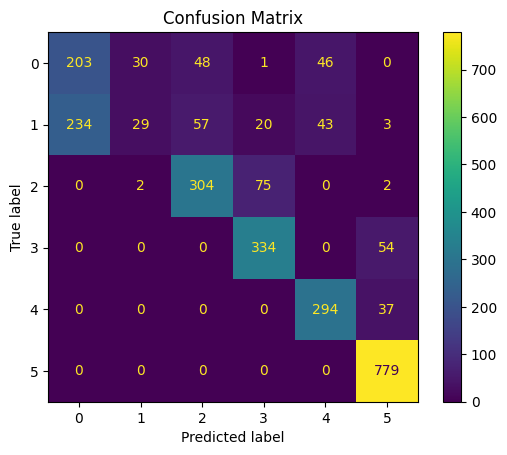

In [283]:
plot_confusion_matrix(svc, X_test, y_test);
plt.title('Confusion Matrix')

###### Predicted results of each model 

In [286]:
#Logistic Regression 
prediction = logreg.predict(X_test)
print(prediction)
cross_check = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_check.sample(10)

[5 1 3 ... 0 5 2]


,Actual,Predicted
1575,2,2
3801,0,0
6386,5,5
7519,5,5
447,3,3
2698,4,0
425,3,3
2458,4,0
7814,5,5
3875,0,0


In [287]:
#Support Vector Machines
prediction = svc.predict(X_test)
print(prediction)
cross_check = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_check.sample(10)

[5 3 3 ... 0 5 2]


,Actual,Predicted
805,3,3
3625,0,0
6931,5,5
3934,0,0
1242,2,2
1310,2,2
4864,1,1
334,3,5
4512,1,4
3322,0,0


In [288]:
#Decision Tree
prediction = decision_tree.predict(X_test)
print(prediction)
cross_check = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_check.sample(10)

[5 2 2 ... 0 5 2]


,Actual,Predicted
3149,4,4
3185,4,4
7192,5,5
6913,5,5
4793,1,1
1485,2,2
2577,4,4
981,3,2
3768,0,0
3790,0,0


In [289]:
#Random Forest 
prediction = random_forest.predict(X_test)
print(prediction)
cross_check = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_check.sample(10)

[5 2 3 ... 0 5 2]


,Actual,Predicted
353,3,3
6812,5,5
3404,0,0
4267,0,0
6433,5,5
1657,2,2
5928,5,5
5176,1,1
5606,5,5
3204,4,4


###### Comparing Model accuracy of each model 

In [290]:
#creating new dataframe for displaying results
compare_models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree'
    ],
    
    'Training Accuracy':
    [ svc_train, log_train, random_forest_train, decision_train],
    
    'Model Accuracy Score': [
        svc_accuracy, log_accuracy, random_forest_accuracy,decision_accuracy]
})



In [291]:
pd.set_option('display.precision',2)
compare_models.sort_values(by='Model Accuracy Score', ascending=True).reset_index(drop=True)

,Model,Training Accuracy,Model Accuracy Score
0,Support Vector Machines,76.30,74.88
1,Logistic Regression,84.14,83.01
2,Decision Tree,85.93,85.05
3,Random Forest,99.83,99.50


From the chosen ML models we found that Random forest is giving the best result with 98.9% accuracy while Support vector machines had the worst model accuracy of 74.8%. 